<a href="https://colab.research.google.com/github/Ameliafauziah/Waste_Management_Analysis/blob/main/Waste_Management_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the uploaded datasets
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Waste_Data/2003_2017_waste.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Waste_Data/2018_2020_waste.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Waste_Data/waste_energy_stat.csv')

In [ ]:
# 📚 STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 STEP 2: Load the Data
df1 = pd.read_csv("2003_2017_waste.csv")
df2 = pd.read_csv("2018_2020_waste.csv")
df3 = pd.read_csv("waste_energy_stat.csv")

# 🔍 STEP 3: Initial Inspection
print("DF1 shape:", df1.shape)
print("DF2 shape:", df2.shape)
print("DF3 shape:", df3.shape)

print("\nDF1 Info:")
print(df1.info())
print("\nDF2 Info:")
print(df2.info())

# 🧹 STEP 4: Standardize Columns
df2.columns = ['waste_type', 'total_waste_generated_tonne', 'total_waste_recycled_tonne', 'year']
df2['total_waste_generated_tonne'] *= 1000
df2['total_waste_recycled_tonne'] *= 1000

# Compute missing columns in df2
df2['waste_disposed_of_tonne'] = df2['total_waste_generated_tonne'] - df2['total_waste_recycled_tonne']
df2['recycling_rate'] = df2['total_waste_recycled_tonne'] / df2['total_waste_generated_tonne']

# Combine datasets
combined_df = pd.concat([df1, df2], ignore_index=True)

# ✨ Clean column names
combined_df.columns = combined_df.columns.str.strip().str.lower().str.replace(' ', '_')

# 🧼 STEP 5: Clean and Check
print("\nCombined DF Shape:", combined_df.shape)
print("\nMissing values:")
print(combined_df.isnull().sum())

print("\nDuplicates:", combined_df.duplicated().sum())

# 🧾 STEP 6: Summary Statistics
print("\nSummary Statistics:")
print(combined_df.describe(include='all'))

# 🧠 STEP 7: Save Clean Data
combined_df.to_csv("cleaned_waste_data.csv", index=False)


DF1 shape: (225, 6)
DF2 shape: (45, 4)
DF3 shape: (5, 6)

DF1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   waste_type                   225 non-null    object 
 1   waste_disposed_of_tonne      225 non-null    int64  
 2   total_waste_recycled_tonne   225 non-null    float64
 3   total_waste_generated_tonne  225 non-null    int64  
 4   recycling_rate               225 non-null    float64
 5   year                         225 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 10.7+ KB
None

DF2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Waste Type                     45 non-null     object
 1   T

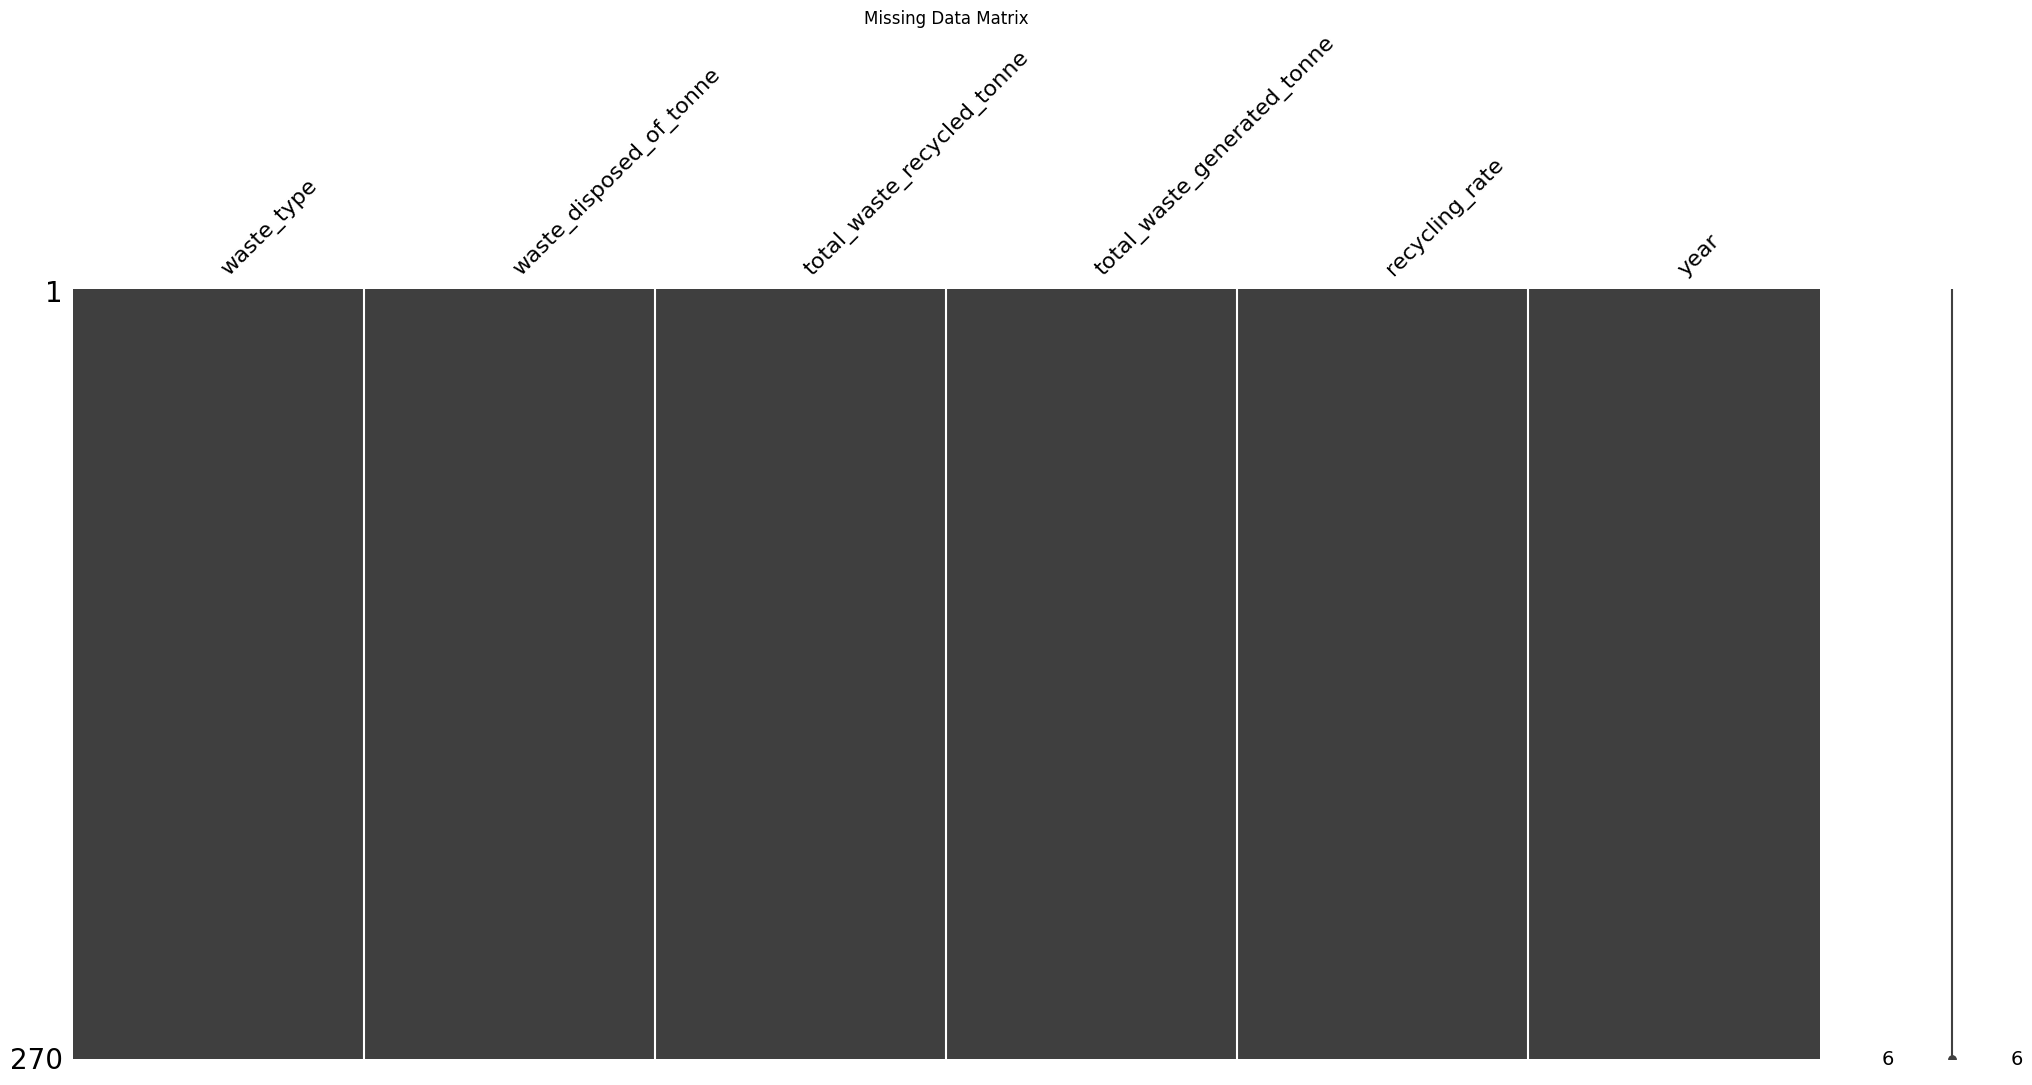


Data Types:
waste_type                      object
waste_disposed_of_tonne          int64
total_waste_recycled_tonne     float64
total_waste_generated_tonne      int64
recycling_rate                 float64
year                             int64
dtype: object


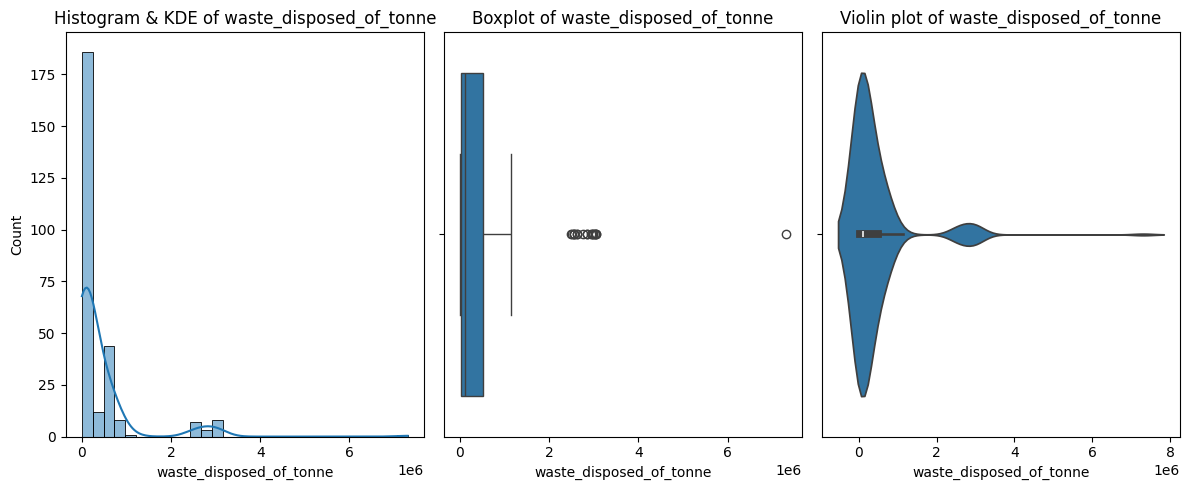

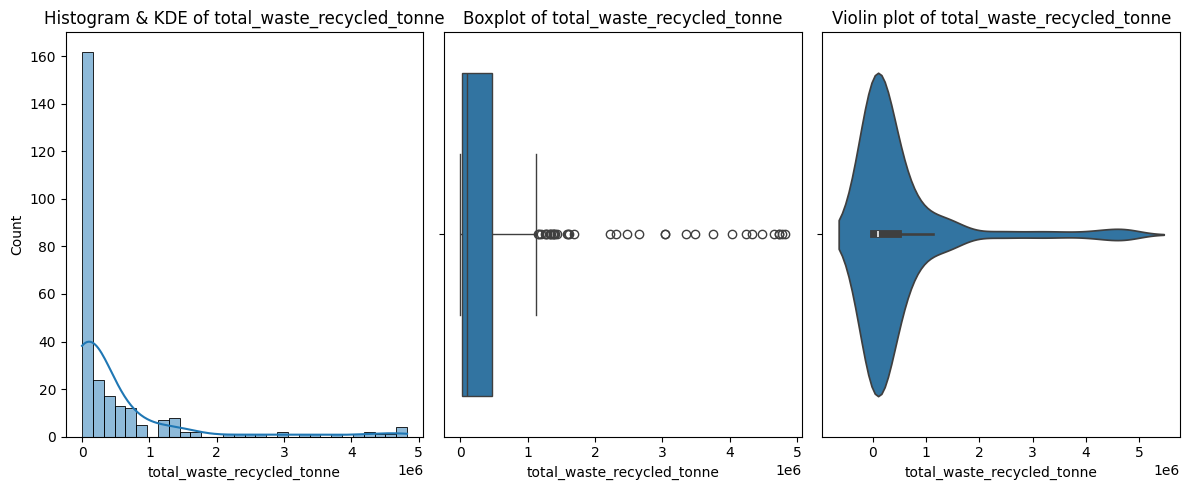

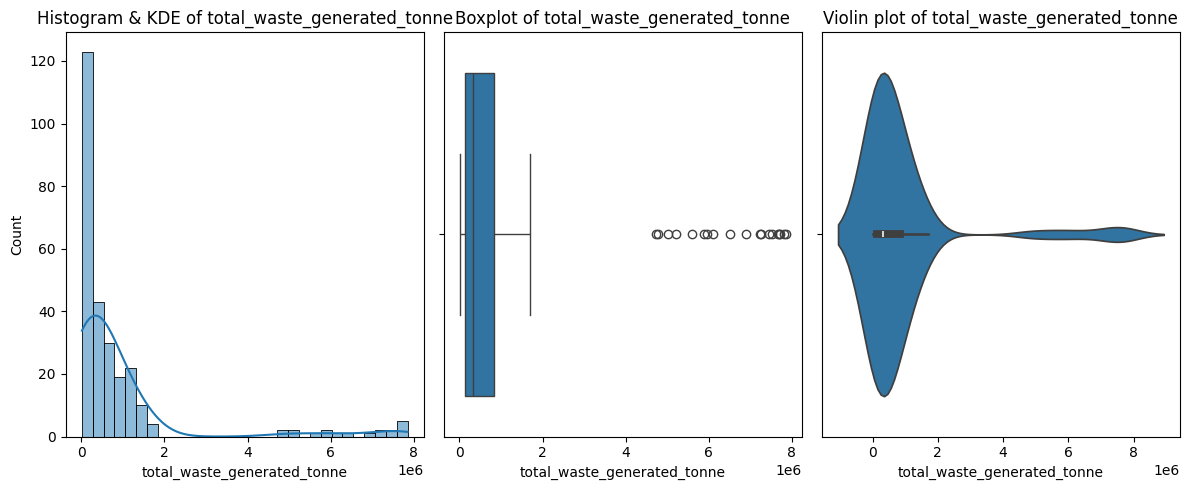

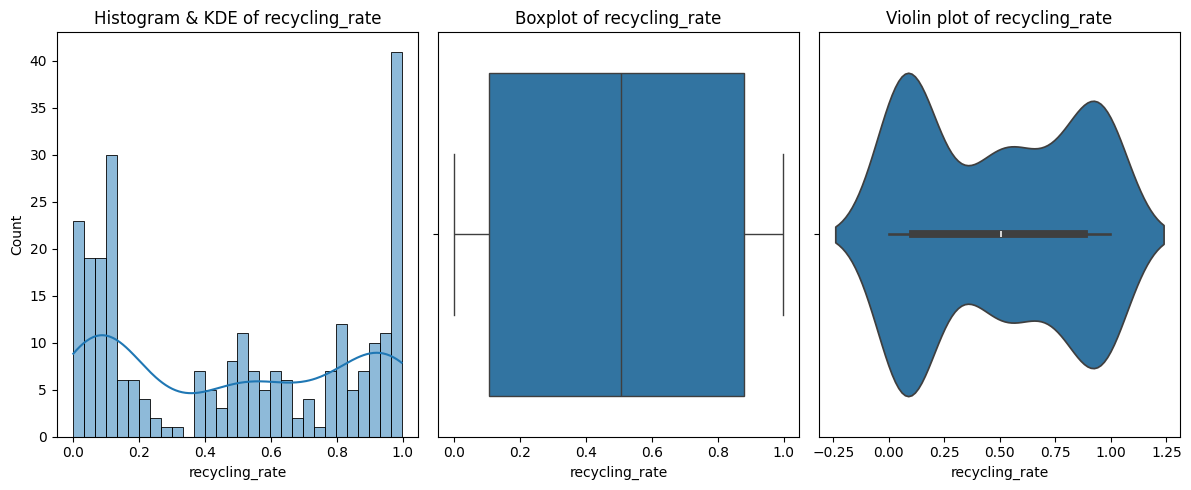

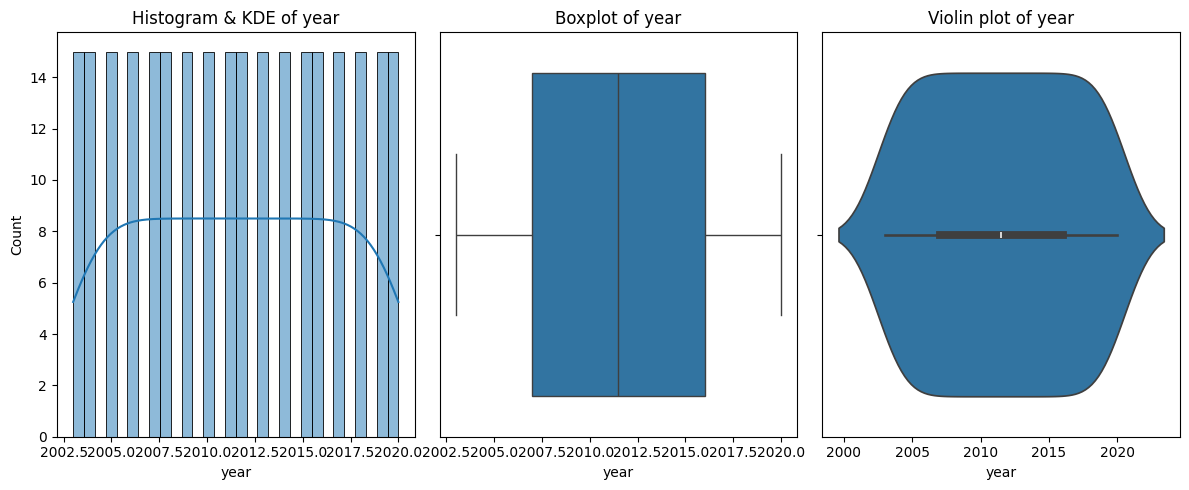


Skewness of Numerical Features:
waste_disposed_of_tonne        4.045271
total_waste_recycled_tonne     3.044032
total_waste_generated_tonne    3.193872
recycling_rate                 0.072274
year                           0.000000
dtype: float64


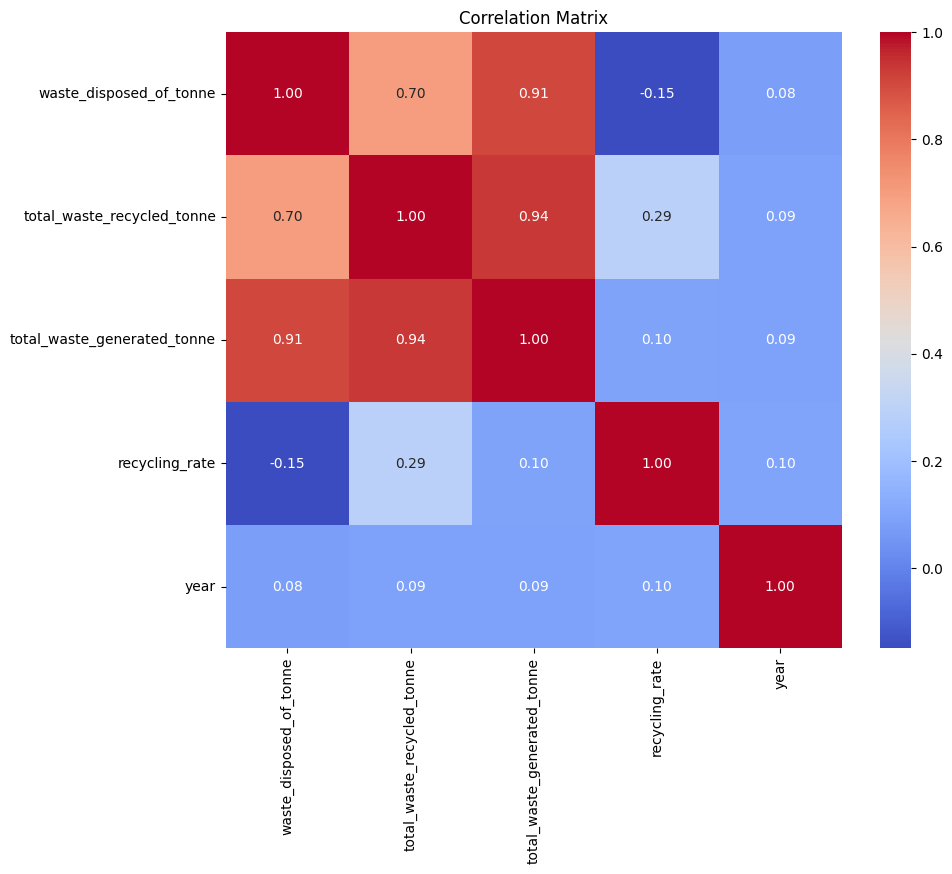


Categorical Features Value Counts:

--- WASTE_TYPE ---
waste_type
Paper/Cardboard                            18
Textile/Leather                            18
Glass                                      18
Plastics                                   17
Total                                      15
Used Slag                                  13
Scrap Tyres                                13
Others (stones, ceramics & rubber etc)     12
Horticultural Waste                        11
Non-ferrous Metals                         11
Sludge                                     11
Wood/Timber                                11
Food waste                                 11
Construction Debris                        11
Ferrous Metal                               9
Food                                        7
Wood                                        7
Ash & Sludge                                5
Used slag                                   5
Ferrous metal                               5
Scrap tyres  

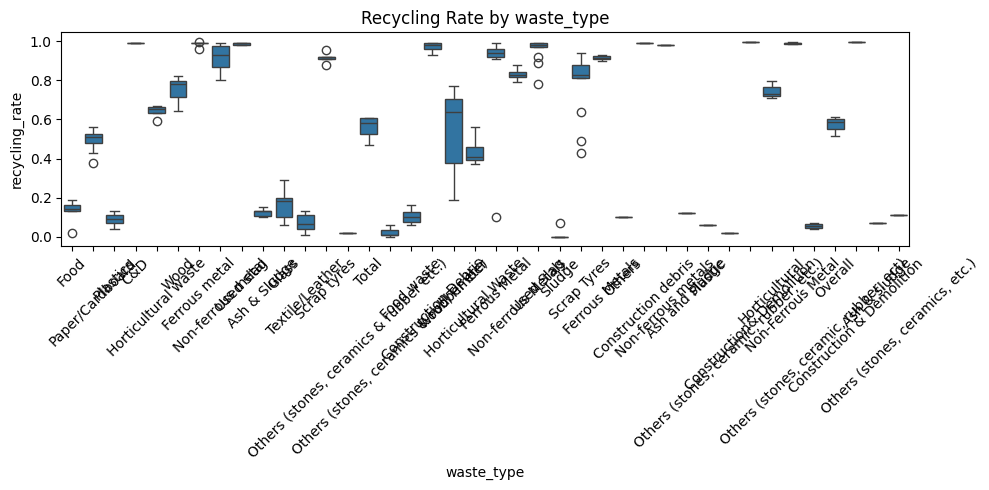

In [ ]:
# 📊 STEP 8: Exploratory Data Analysis (EDA)

# Load clean data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_waste_data.csv")

# 🧠 Step 8.1: Missing Data Visualization
import missingno as msno
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

# 🧮 Step 8.2: Overview of Data Types
print("\nData Types:")
print(df.dtypes)

# 🔢 Step 8.3: Distribution of Numerical Features
num_features = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_features:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.subplot(1, 3, 3)
    sns.violinplot(x=df[col])
    plt.title(f'Violin plot of {col}')

    plt.tight_layout()
    plt.show()

# 📈 Step 8.4: Skewness
from scipy.stats import skew
print("\nSkewness of Numerical Features:")
print(df[num_features].skew())

# 🔗 Step 8.5: Correlation Matrix
plt.figure(figsize=(10, 8))
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

# 🧮 Step 8.6: Categorical Overview
cat_features = df.select_dtypes(include=['object']).columns
print("\nCategorical Features Value Counts:")
for col in cat_features:
    print(f"\n--- {col.upper()} ---")
    print(df[col].value_counts())
    print(f"Cardinality: {df[col].nunique()}")

# 🎯 Step 8.7: Categorical vs Target (Recycling Rate)
for col in cat_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='recycling_rate')
    plt.xticks(rotation=45)
    plt.title(f'Recycling Rate by {col}')
    plt.tight_layout()
    plt.show()


In [ ]:
# 🧼 STEP 9: Data Preprocessing – Outlier Detection and Scaling

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Load cleaned data
df = pd.read_csv("cleaned_waste_data.csv")

# Separate features
num_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_features = df.select_dtypes(include='object').columns.tolist()

# 📦 Step 9.1: Detect Outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

print("\nOutlier counts per numerical column:")
for col in num_features:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

# ⚖️ Step 9.2: Optionally Remove or Cap Outliers
# Example: Capping recycling_rate and waste_disposed_of_tonne
for col in ['recycling_rate', 'waste_disposed_of_tonne']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

# ⚙️ Step 9.3: Feature Scaling
# We'll use RobustScaler to handle outliers better
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[num_features] = scaler.fit_transform(df[num_features])

# ✅ Save scaled dataset
df_scaled.to_csv("scaled_waste_data.csv", index=False)
print("Scaled data saved as 'scaled_waste_data.csv'")



Outlier counts per numerical column:
waste_disposed_of_tonne: 19 outliers
total_waste_recycled_tonne: 36 outliers
total_waste_generated_tonne: 19 outliers
recycling_rate: 0 outliers
year: 0 outliers
Scaled data saved as 'scaled_waste_data.csv'


In [ ]:
# 🚀 STEP 10: Feature Engineering, Encoding & ML Pipeline

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load scaled dataset
df = pd.read_csv("scaled_waste_data.csv")

# 🎯 Step 10.1: Define Target and Features
target = 'recycling_rate'
X = df.drop(columns=[target])
y = df[target]

# 🏗 Step 10.2: One-Hot Encoding for Categorical Features
cat_features = X.select_dtypes(include='object').columns.tolist()
num_features = X.select_dtypes(exclude='object').columns.tolist()

# 🎛 Step 10.3: Build ColumnTransformer
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
], remainder='passthrough')

# 🛠 Step 10.4: ML Pipeline with Random Forest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# 🔍 Step 10.5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔁 Step 10.6: Hyperparameter Tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [5, 10, None],
    'regressor__min_samples_split': [2, 5],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# ✅ Step 10.7: Evaluate Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n📈 Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
print("R2 Score:", r2_score(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

📈 Model Performance:
MAE: 0.0323042367377175
MSE: 0.0032153558040198434
RMSE: 0.05670410747044559
R2 Score: 0.9841770076905576
Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# 🚀 ML Pipeline: Predicting Waste Generated (waste_disposed_of_tonne)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load dataset
df_waste = pd.read_csv("scaled_waste_data.csv")  # Already preprocessed and scaled

# STEP 2: Define features and new target
target_waste = 'waste_disposed_of_tonne'
X_waste = df_waste.drop(columns=[target_waste])
y_waste = df_waste[target_waste]

# STEP 3: Identify feature types
cat_features_waste = X_waste.select_dtypes(include='object').columns.tolist()
num_features_waste = X_waste.select_dtypes(exclude='object').columns.tolist()

# STEP 4: Preprocessing for categorical features
preprocessor_waste = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features_waste)
], remainder='passthrough')

# STEP 5: Build ML Pipeline
pipeline_waste = Pipeline(steps=[
    ('preprocessor', preprocessor_waste),
    ('regressor', RandomForestRegressor(random_state=42))
])

# STEP 6: Train/Test Split
X_train_waste, X_test_waste, y_train_waste, y_test_waste = train_test_split(
    X_waste, y_waste, test_size=0.2, random_state=42
)

# STEP 7: Grid Search for Hyperparameter Tuning
param_grid_waste = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [5, 10, None],
    'regressor__min_samples_split': [2, 5],
}

grid_waste = GridSearchCV(
    pipeline_waste, param_grid=param_grid_waste,
    cv=5, scoring='r2', n_jobs=-1, verbose=1
)

grid_waste.fit(X_train_waste, y_train_waste)

# STEP 8: Best model & prediction
best_model_waste = grid_waste.best_estimator_
y_pred_waste = best_model_waste.predict(X_test_waste)

# STEP 9: Evaluation Metrics (Fixed for older sklearn)
mae = mean_absolute_error(y_test_waste, y_pred_waste)
mse = mean_squared_error(y_test_waste, y_pred_waste)
rmse = mse ** 0.5
r2 = r2_score(y_test_waste, y_pred_waste)

print("\n📈 Waste Prediction Model Performance:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)
print("Best Params:", grid_waste.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits

📈 Waste Prediction Model Performance:
MAE: 0.0740039767627367
MSE: 0.038028862660505154
RMSE: 0.1950099040061944
R² Score: 0.9444760434501626
Best Params: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



📊 XGBoost Model Performance:
MAE: 0.11403856352134631
MSE: 0.09884365079728583
RMSE: 0.3143941010853827
R² Score: 0.8556835469656167


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


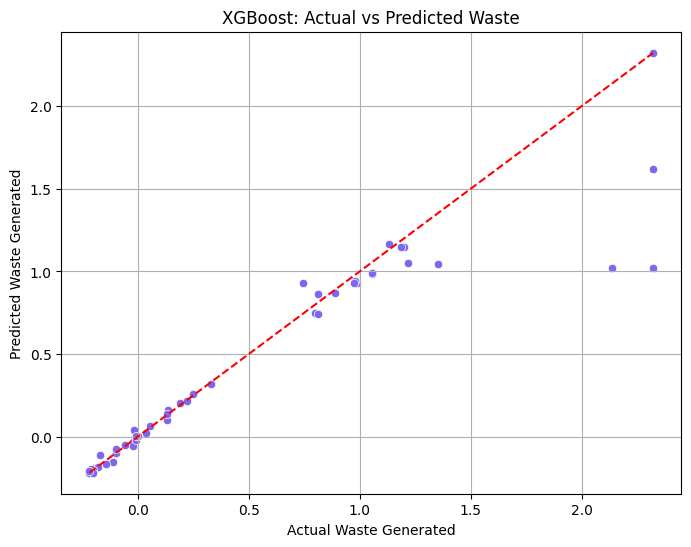

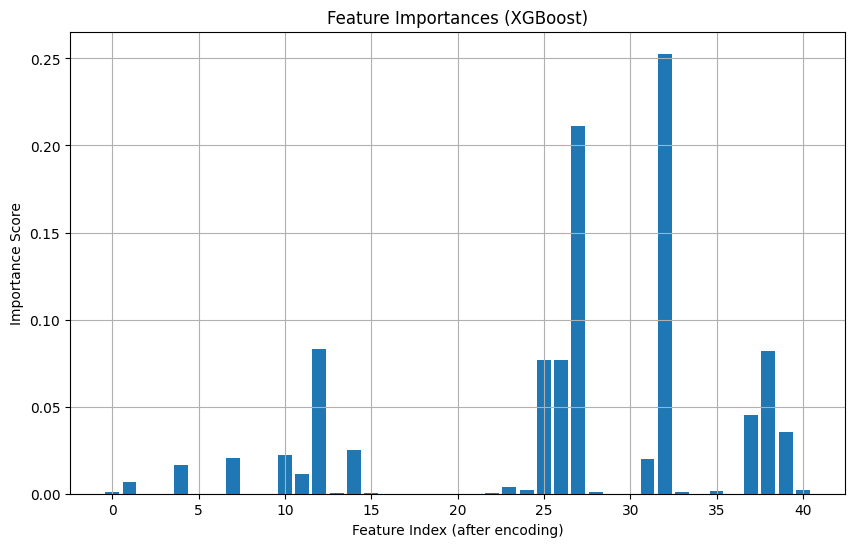

In [ ]:
# 🧪 ML: Predicting Waste Generated using XGBoost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load preprocessed data
df_waste = pd.read_csv("scaled_waste_data.csv")

# STEP 2: Define features and target
target_waste = 'waste_disposed_of_tonne'
X_waste = df_waste.drop(columns=[target_waste])
y_waste = df_waste[target_waste]

# STEP 3: Identify categorical and numerical features
cat_features = X_waste.select_dtypes(include='object').columns.tolist()
num_features = X_waste.select_dtypes(exclude='object').columns.tolist()

# STEP 4: Preprocessor (One-hot for categorical features)
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
], remainder='passthrough')

# STEP 5: XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# STEP 6: Pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb_model)
])

# STEP 7: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_waste, y_waste, test_size=0.2, random_state=42
)

# STEP 8: Fit Model
pipeline_xgb.fit(X_train, y_train)

# STEP 9: Predict
y_pred = pipeline_xgb.predict(X_test)

# STEP 10: Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n📊 XGBoost Model Performance:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# STEP 11: Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='mediumslateblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Waste Generated")
plt.ylabel("Predicted Waste Generated")
plt.title("XGBoost: Actual vs Predicted Waste")
plt.grid(True)
plt.show()

# STEP 12: Feature Importance (optional)
xgb_fitted_model = pipeline_xgb.named_steps['xgb']
importances = xgb_fitted_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importances (XGBoost)")
plt.xlabel("Feature Index (after encoding)")
plt.ylabel("Importance Score")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Build base pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Define grid
param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [4, 6, 8],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__subsample': [0.7, 0.9],
    'xgb__colsample_bytree': [0.7, 0.9]
}

# Grid search
grid_xgb = GridSearchCV(
    pipeline_xgb, param_grid_xgb,
    cv=5, scoring='r2', n_jobs=-1, verbose=1
)

grid_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = grid_xgb.predict(X_test)

# Evaluation
print("📈 Tuned XGBoost R²:", r2_score(y_test, y_pred_xgb))
print("Best Params:", grid_xgb.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
📈 Tuned XGBoost R²: 0.8890807054538115
Best Params: {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 200, 'xgb__subsample': 0.7}


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [ ]:

from catboost import CatBoostRegressor, Pool

# Convert categorical column indexes
cat_cols_idx = [X_train.columns.get_loc(col) for col in cat_features]

# CatBoost model
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    cat_features=cat_cols_idx,
    verbose=100,
    random_state=42
)

# Fit directly
cat_model.fit(X_train, y_train, cat_features=cat_cols_idx)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluation
print("📊 CatBoost R²:", r2_score(y_test, y_pred_cat))

0:	learn: 0.6485923	total: 48.6ms	remaining: 24.3s
100:	learn: 0.0256047	total: 302ms	remaining: 1.19s
200:	learn: 0.0132119	total: 580ms	remaining: 863ms
300:	learn: 0.0082058	total: 864ms	remaining: 571ms
400:	learn: 0.0057705	total: 966ms	remaining: 239ms
499:	learn: 0.0047180	total: 1.07s	remaining: 0us
📊 CatBoost R²: 0.945040134554184


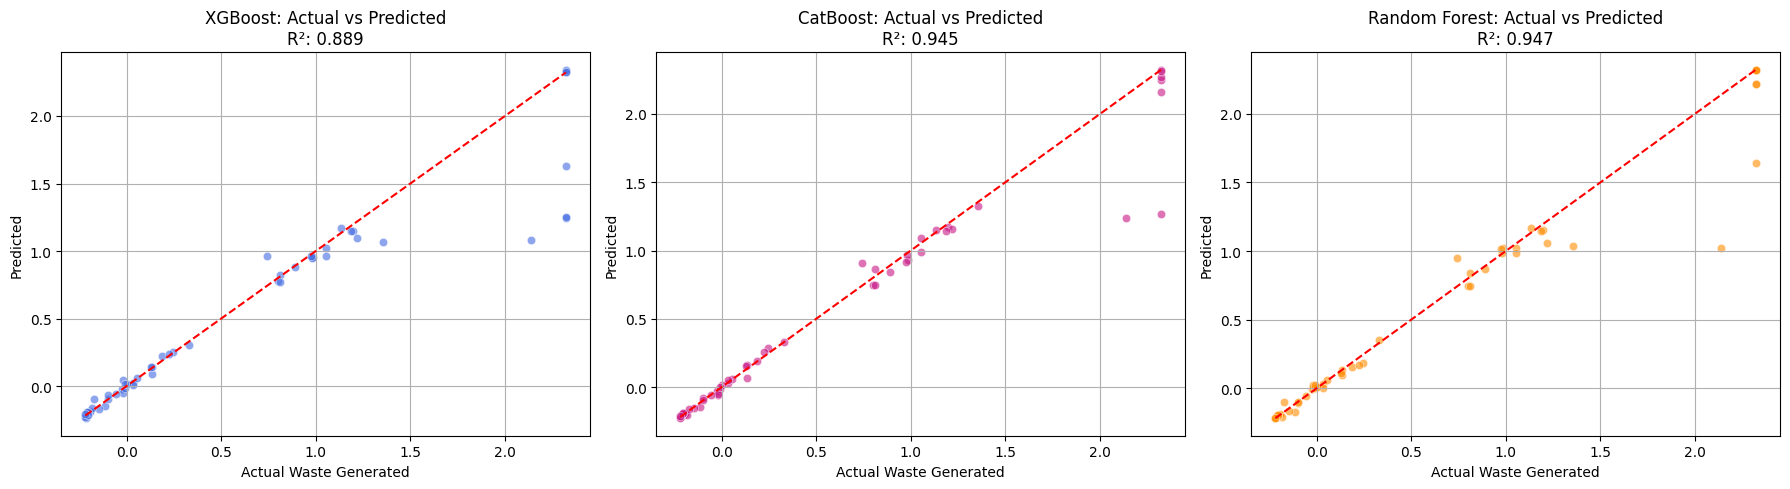

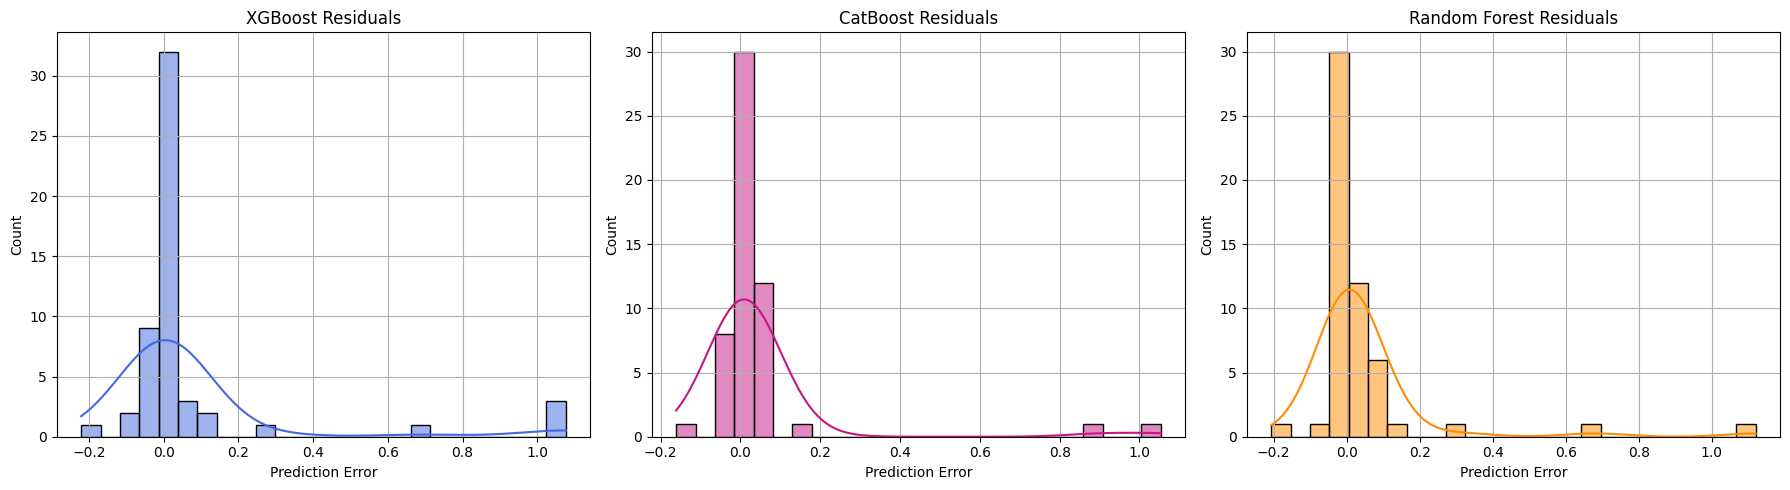

<ipython-input-68-4675b2d3e21f>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette=colors)


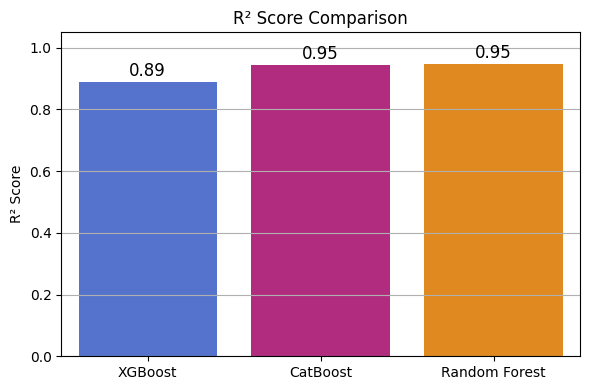

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predictions (assumed from earlier runs)
# y_pred_xgb     - from tuned XGBoost
# y_pred_cat     - from CatBoost
# y_pred_rf      - from baseline model like RandomForest

# Compute scores
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_cat = r2_score(y_test, y_pred_cat)
r2_rf  = r2_score(y_test, y_pred_rf)

# === 1. Scatter Plots: Actual vs Predicted ===
plt.figure(figsize=(18, 5))

models = ['XGBoost', 'CatBoost', 'Random Forest']
preds = [y_pred_xgb, y_pred_cat, y_pred_rf]
colors = ['royalblue', 'mediumvioletred', 'darkorange']

for i, (model, y_pred, color) in enumerate(zip(models, preds, colors)):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=y_test, y=y_pred, color=color, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Waste Generated")
    plt.ylabel("Predicted")
    plt.title(f"{model}: Actual vs Predicted\nR²: {r2_score(y_test, y_pred):.3f}")
    plt.grid(True)

plt.tight_layout()
plt.show()

# === 2. Residual Plots ===
plt.figure(figsize=(18, 5))

for i, (model, y_pred, color) in enumerate(zip(models, preds, colors)):
    residuals = y_test - y_pred
    plt.subplot(1, 3, i+1)
    sns.histplot(residuals, kde=True, color=color, bins=25)
    plt.title(f"{model} Residuals")
    plt.xlabel("Prediction Error")
    plt.grid(True)

plt.tight_layout()
plt.show()

# === 3. Bar Chart: R² Comparison ===
plt.figure(figsize=(6, 4))
r2_scores = [r2_xgb, r2_cat, r2_rf]

sns.barplot(x=models, y=r2_scores, palette=colors)
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.ylim(0, 1.05)
plt.grid(axis='y')
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()
